## 1. load packages

In [1]:
import anndata
import pandas as pd
import scanpy as sc

## 2. load data

In [3]:
DAGs_AD_nonAD=pd.read_csv('/lustre1/project/stg_00079/students/tingting/data/sun/snap2_allfragments/08/exploratory/200DAGs_AD_nonAD.csv', index_col=0)

In [3]:
DAGs_AD_nonAD.head()

,Log2FC,Adjusted_pval,Contrast,cluster
SBK2,0.814964,3.083634e-12,AD,AD
OR2Z1,0.743577,2.107615e-24,AD,AD
SCN10A,0.743252,4.192054e-24,AD,AD
SPRR3,0.645905,3.384944e-02,AD,AD
SPRR1A,0.645905,3.384944e-02,AD,AD


In [4]:
DAGs_AD_nonAD.shape

(400, 4)

In [5]:
DAGs_AD_nonAD.cluster.value_counts()

AD       200
nonAD    200
Name: cluster, dtype: int64

In [4]:
DAGs_cluster=pd.read_csv('/lustre1/project/stg_00079/students/tingting/data/sun/snap2_allfragments/08/exploratory/200DAGs_each_clusters.csv', index_col=0)

In [7]:
DAGs_cluster.head()

,Log2FC,Adjusted_pval,Contrast,cluster
X,,,,
KRTAP9-7,1.747022,0.000000e+00,0,0
TNXB,1.374449,4.681686e-19,0,0
GKN1,1.325519,1.082568e-30,0,0
GKN2,1.325519,1.082568e-30,0,0
B4GALNT2,1.169679,9.550437e-211,0,0


In [8]:
DAGs_cluster.shape

(1800, 4)

In [5]:
DAGs_cluster.cluster.value_counts()

0    200
1    200
2    200
3    200
4    200
5    200
6    200
7    200
8    200
Name: cluster, dtype: int64

## 3. data manage

In [38]:
DAGs_cluster['cluster']=DAGs_cluster['cluster'].astype(str)

In [39]:
DAGs_cluster.head()

,Log2FC,Adjusted_pval,Contrast,cluster
X,,,,
KRTAP9-7,1.747022,0.000000e+00,0,0_up
TNXB,1.374449,4.681686e-19,0,0_up
GKN1,1.325519,1.082568e-30,0,0_up
GKN2,1.325519,1.082568e-30,0,0_up
B4GALNT2,1.169679,9.550437e-211,0,0_up


In [40]:
top_10_each_cluster = DAGs_cluster.groupby('cluster').head(10)

top_10_each_cluster

,Log2FC,Adjusted_pval,Contrast,cluster
X,,,,
KRTAP9-7,1.747022,0.000000e+00,0,0_up
TNXB,1.374449,4.681686e-19,0,0_up
GKN1,1.325519,1.082568e-30,0,0_up
GKN2,1.325519,1.082568e-30,0,0_up
B4GALNT2,1.169679,9.550437e-211,0,0_up
...,...,...,...,...
FAM72C,-0.989274,4.002281e-221,8,8_down
DGKK,-0.990278,4.705240e-293,8,8_down
CST8,-0.995651,9.992513e-283,8,8_down


In [7]:
# DAGs_cluster['cluster']= f'{i}_up' for i in DAGs_cluster['cluster'] if DAGs_cluster['Log2FC']>0 else f"{i}_down"
def suffix_cluster(row):
    return f"{row['cluster']}_up" if row['Log2FC'] > 0 else f"{row['cluster']}_down"

DAGs_cluster['cluster'] = DAGs_cluster.apply(suffix_cluster, axis=1)


In [8]:
DAGs_AD_nonAD['cluster'] = DAGs_AD_nonAD.apply(suffix_cluster, axis=1)

In [9]:
DAGs_cluster.head()

,Log2FC,Adjusted_pval,Contrast,cluster
X,,,,
KRTAP9-7,1.747022,0.000000e+00,0,0_up
TNXB,1.374449,4.681686e-19,0,0_up
GKN1,1.325519,1.082568e-30,0,0_up
GKN2,1.325519,1.082568e-30,0,0_up
B4GALNT2,1.169679,9.550437e-211,0,0_up


In [10]:
DAGs_AD_nonAD.head()

,Log2FC,Adjusted_pval,Contrast,cluster
SBK2,0.814964,3.083634e-12,AD,AD_up
OR2Z1,0.743577,2.107615e-24,AD,AD_up
SCN10A,0.743252,4.192054e-24,AD,AD_up
SPRR3,0.645905,3.384944e-02,AD,AD_up
SPRR1A,0.645905,3.384944e-02,AD,AD_up


In [11]:
genes_dict = DAGs_cluster.groupby('cluster').apply(lambda df: df.index.tolist()).to_dict()

In [12]:
genes_dict.keys()

dict_keys(['0_down', '0_up', '1_down', '1_up', '2_down', '2_up', '3_down', '3_up', '4_down', '4_up', '5_down', '5_up', '6_down', '6_up', '7_down', '7_up', '8_down', '8_up'])

## 4. create dictionary

In [13]:
genes_dict_ad= DAGs_AD_nonAD.groupby('cluster').apply(lambda df: df.index.tolist()).to_dict()

In [14]:
genes_dict_ad.keys()

dict_keys(['AD_down', 'AD_up', 'nonAD_down', 'nonAD_up'])

In [15]:
genes_dict.update(genes_dict_ad)

In [16]:
genes_dict.keys()

dict_keys(['0_down', '0_up', '1_down', '1_up', '2_down', '2_up', '3_down', '3_up', '4_down', '4_up', '5_down', '5_up', '6_down', '6_up', '7_down', '7_up', '8_down', '8_up', 'AD_down', 'AD_up', 'nonAD_down', 'nonAD_up'])

In [23]:
del genes_dict['nonAD_down']
del genes_dict['nonAD_up']

In [24]:
genes_dict.keys()

dict_keys(['0_down', '0_up', '1_down', '1_up', '2_down', '2_up', '3_down', '3_up', '4_down', '4_up', '5_down', '5_up', '6_down', '6_up', '7_down', '7_up', '8_down', '8_up', 'AD_down', 'AD_up'])

## 5. heatmap

In [2]:
cell_gene=anndata.read_h5ad('/lustre1/project/stg_00079/students/tingting/data/sun/snap2_allfragments/08/030results_cistopic/cell_gene02.h5ad')

In [4]:
cell_gene

AnnData object with n_obs × n_vars = 45456 × 17286
    obs: 'barcode', 'celltype', 'leiden_mnc_0.8', 'pycisTopic_leiden_10_0.3', 'pycisTopic_leiden_10_0.5', 'pycisTopic_leiden_10_0.8', 'pycisTopic_leiden_10_1.0'
    uns: 'celltype_colors', 'dendrogram_celltype', 'dendrogram_pycisTopic_leiden_10_0.5', 'pycisTopic_leiden_10_0.5_colors'
    obsm: 'X_pca'
    layers: 'scaled'

In [5]:
sc.pp.neighbors(cell_gene, use_rep='X')

/data/leuven/351/vsc35107/miniconda3/envs/scenic2/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


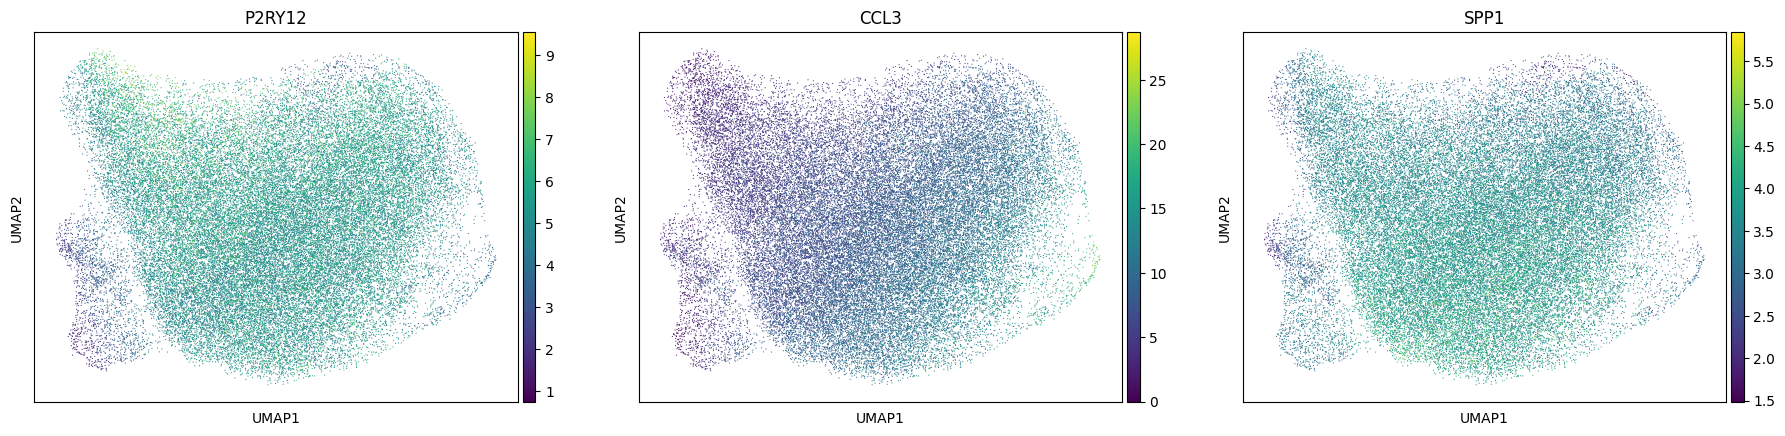

In [6]:
sc.tl.umap(cell_gene)
sc.pl.umap(cell_gene, color=['P2RY12', 'CCL3', 'SPP1'])

In [27]:
del cell_gene

/data/leuven/351/vsc35107/miniconda3/envs/scenic2/lib/python3.11/site-packages/scanpy/plotting/_anndata.py:2406: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  obs_tidy.index.value_counts(sort=False).iteritems()


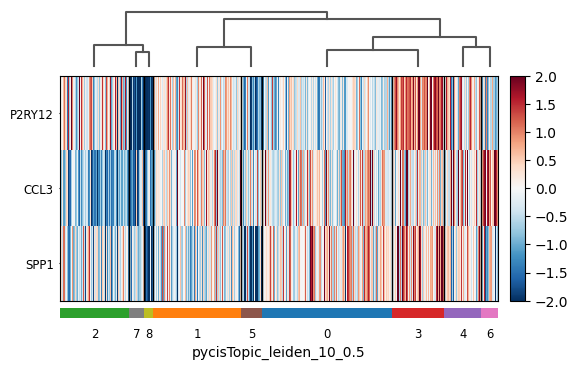

In [5]:
sc.pl.heatmap(
    cell_gene,
    ['P2RY12', 'CCL3', 'SPP1'],
    # var_group_labels=genes_dict.keys(),
    # var_names=genes_dict.keys(),
    groupby="pycisTopic_leiden_10_0.5",
    layer="scaled",
    vmin=-2,
    vmax=2,
    cmap="RdBu_r",
    dendrogram=True,
    swap_axes=True,
    figsize=(6, 4),
    show_gene_labels=True,
    show=True,
    save='heatmap_sun_atatc_cell_states_marker.png'
)

In [30]:
cell_gene

AnnData object with n_obs × n_vars = 45456 × 17286
    obs: 'barcode', 'celltype', 'leiden_mnc_0.8', 'pycisTopic_leiden_10_0.3', 'pycisTopic_leiden_10_0.5', 'pycisTopic_leiden_10_0.8', 'pycisTopic_leiden_10_1.0'
    uns: 'celltype_colors', 'dendrogram_celltype', 'dendrogram_pycisTopic_leiden_10_0.5', 'pycisTopic_leiden_10_0.5_colors', 'leiden_mnc_0.8_colors', 'dendrogram_leiden_mnc_0.8'
    obsm: 'X_pca'
    layers: 'scaled'

categories: 0, 1, 2, etc.
var_group_labels: 0_down, 0_up, 1_down, etc.


/data/leuven/351/vsc35107/miniconda3/envs/scenic2/lib/python3.11/site-packages/scanpy/plotting/_anndata.py:2406: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  obs_tidy.index.value_counts(sort=False).iteritems()


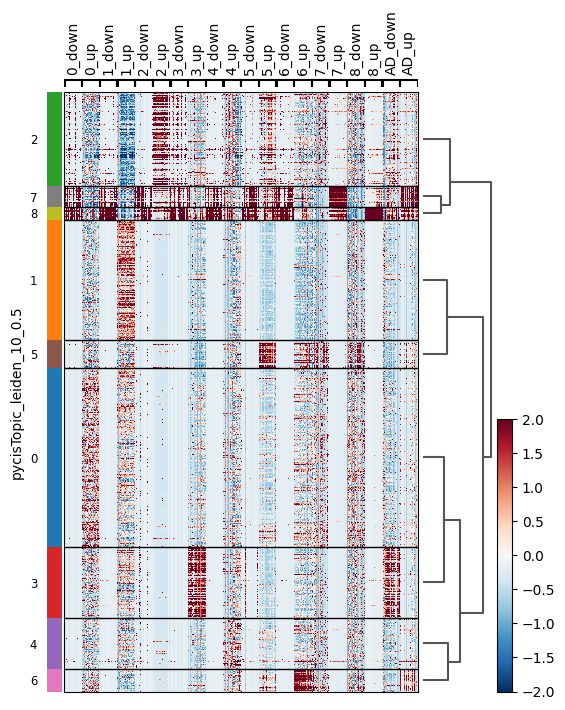

In [32]:
sc.pl.heatmap(
    cell_gene,
    genes_dict,
    var_group_labels=genes_dict.keys(),
    # var_names=genes_dict.keys(),
    groupby="pycisTopic_leiden_10_0.5",
    layer="scaled",
    vmin=-2,
    vmax=2,
    cmap="RdBu_r",
    dendrogram=True,
    swap_axes=False,
    figsize=(6, 8),
    show_gene_labels=False,
    show=True,
    save='heatmap_genes_100_up_down_snap.png'
)

## 6. nicol genes

In [33]:
nicol_genes=pd.read_csv('/lustre1/project/stg_00079/students/tingting/database/metadata/newnicomarkers.csv', index_col=0)

In [34]:
#Could not find keys '['CCL3L1', 'RPS3A']' in columns of `adata.obs` or in adata.var_names.
all_intersect_variable=set(nicol_genes['gene']).intersection(set(cell_gene.var_names))
nicol_genes = nicol_genes[nicol_genes['gene'].isin(all_intersect_variable)]

In [35]:
top10_nicol_genes = {}
for x in nicol_genes.index.unique():
    top10_nicol_genes[x]=nicol_genes[nicol_genes.index==x].head(10)['gene'].tolist()
top10_nicol_genes

{'Homeostatic (HM)': ['P2RY12',
  'CX3CR1',
  'P2RY13',
  'MAF',
  'LYVE1',
  'CST3',
  'LPAR6',
  'SFMBT2',
  'ABCG2',
  'FCGRT'],
 'Transitioning CRM': ['FOS',
  'JUN',
  'DUSP1',
  'KLF2',
  'HSPA1A',
  'IER2',
  'IER3',
  'RHOB',
  'GADD45B',
  'JUNB'],
 'Cytokines response 1 (CRM-1)': ['CCL3',
  'FOS',
  'DUSP1',
  'IER2',
  'KLF2',
  'JUN',
  'JUNB',
  'CH25H',
  'GADD45B',
  'ZFP36'],
 'Cytokines response 2 (CRM-2)': ['CCL4',
  'CCL3',
  'CCL2',
  'IL1B',
  'CCL4L2',
  'NFKBIA',
  'SOD2',
  'CCL8',
  'GPR84',
  'GADD45B'],
 'Ribosomal response (RM)': ['TPT1',
  'RPL13',
  'RPS23',
  'RPS4X',
  'RPL34',
  'RPS8',
  'RPS14',
  'RPL30',
  'RPS24',
  'RPLP1'],
 'Disease associated (DAM)': ['CD9',
  'APOC1',
  'SPP1',
  'LGALS1',
  'LGALS3',
  'GPNMB',
  'ASAH1',
  'LIPA',
  'PLA2G7',
  'CTSD'],
 'Antigen-presenting response (HLA)': ['HLA-DRA',
  'HLA-DPA1',
  'HLA-DRB5',
  'HLA-DRB1',
  'CD74',
  'HLA-DPB1',
  'HLA-DMA',
  'APOC1',
  'HLA-DQA1',
  'MS4A6A'],
 'Interferon response (I

categories: 0, 1, 2, etc.
var_group_labels: Homeostatic (HM), Transitioning CRM, Cytokines response 1 (CRM-1), etc.


/data/leuven/351/vsc35107/miniconda3/envs/scenic2/lib/python3.11/site-packages/scanpy/plotting/_anndata.py:2406: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  obs_tidy.index.value_counts(sort=False).iteritems()


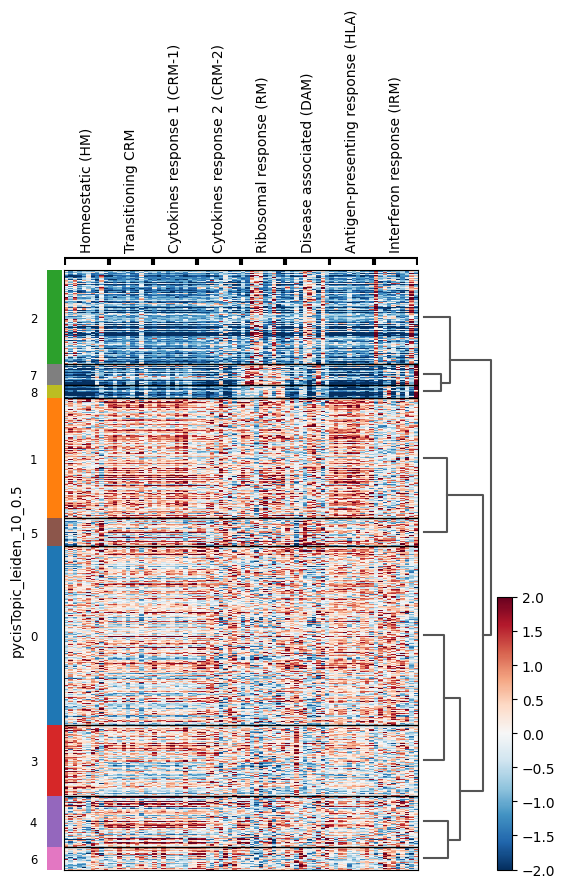

In [36]:
sc.pl.heatmap(
    cell_gene,
    top10_nicol_genes,
    var_group_labels=top10_nicol_genes.keys(),
    # var_names=genes_dict.keys(),
    groupby="pycisTopic_leiden_10_0.5",
    layer="scaled",
    vmin=-2,
    vmax=2,
    cmap="RdBu_r",
    dendrogram=True,
    swap_axes=False,
    figsize=(6, 8),
    show_gene_labels=False,
    show=True,
    save='_10_nicol_genes.png'
)